# Taylor series

Taylor series of a function is the *infinite* sum of the function and its derivatives at that point. The function value near a point can be evaluated by the Taylor series at that point. For example, the function value at $f(x+h)$ can be evaluated by the function and its derivatives evaluated at $x$:

$$
f(x+h) = f(x) + h f'(x) + h^2 \frac{f''(x)}{2!} + h^3 \frac{f'''(x)}{3!} + h^4 \frac{f''''(x)}{4!} + \cdots (\text{infinite terms})
$$

Recall that the expression: $n! = 1 \times 2 \times 3 \cdots \times n$.

In practice, we can only evalue *finite* number of terms. The resulting *truncated* Taylor series can then be used to *approximate* the function at a nearby location. For example, the Taylor series of the $f(x) = \sin(x)$ function at a location $x$ that is near $x_0$ is:
$$
f(x) = f(x_0) + (x-x_0) f'(x_0) + (x-x_0)^2 \frac{f''(x_0)}{2!} + (x-x_0)^3\frac{f'''(x_0)}{3!} + \cdots
$$

Note that all the terms on the right-hand-side is evaluated at $x_0$.

Recall that
$$
\sin'(x) = \cos(x) \\
\cos'(x) = -\sin(x)
$$
that is,
$$ 
f'(x) = \cos(x)\\
f''(x) = -\sin(x) \\
f'''(x) = -\cos(x) \\
f''''(x) = \sin(x) 
$$
We have
$$
f(x) = f(x_0) + (x-x_0) f'(x_0) + (x-x_0)^2 \frac{f''(x_0)}{2!} + (x-x_0)^3\frac{f'''(x_0)}{3!} + \cdots \\
     = \sin(x_0) + (x-x_0) \cos(x_0) + (x-x_0)^2 \frac{-\sin(x_0)}{2!} + (x-x_0)^3\frac{-\cos(x_0)}{3!} + \cdots
$$

We now can write a Python program to compute this.

In [1]:
%matplotlib inline
import sympy as sy
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# symbolic function (so we can take derivatives symbolically)
x = sy.Symbol('x')
f = sy.sin(x)

In [3]:
# Define the factorial function
# factorial(n) = 1*2*3*...*n

def factorial(n):
    if n <= 0:
        return 1
    else:
        return n*factorial(n-1)

In [4]:
# for example
factorial(3)

6

In [5]:
# n-terms Taylor series at x=x0

def taylor(func,x0,n):
    i = 0
    p = 0
    while i <= n:
        p = p + (func.diff(x,i).subs(x,x0)) / (factorial(i))*(x-x0)**i
        i += 1
    return p

taylor(f, 0, 5)

x**5/120 - x**3/6 + x

Now we can visualize the approximating capability of truncated Taylor series by plotting them.

Taylor expansion at n=1 x
Taylor expansion at n=3 -x**3/6 + x
Taylor expansion at n=5 x**5/120 - x**3/6 + x
Taylor expansion at n=7 -x**7/5040 + x**5/120 - x**3/6 + x
Taylor expansion at n=9 x**9/362880 - x**7/5040 + x**5/120 - x**3/6 + x


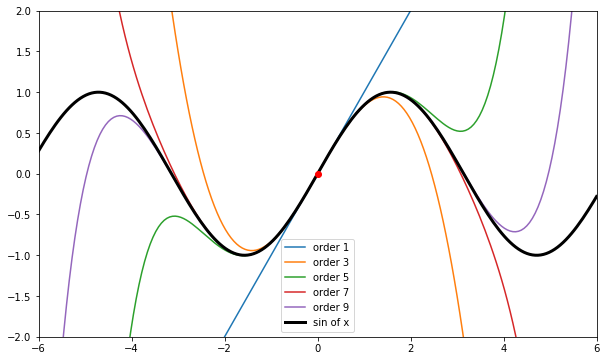

In [6]:
x0 = 0

def plot():
    x1 = np.linspace(-6,6,201)
    y1 = []
    plt.figure(figsize=(10,6))
    for j in range(1,10,2):    # n-term Taylor series
        func = taylor(f,x0,j)
        print('Taylor expansion at n='+str(j),func)
        for k in x1:
            y1.append(func.subs(x,k))
        plt.plot(x1,y1,label='order '+str(j))
        y1 = []
    
    plt.plot(x1,np.sin(x1), 'k-', linewidth=3, label='sin of x')
    
    plt.plot(np.array([0]), [np.sin(0)], 'ro')
    
    plt.ylim((-2,2))
    plt.xlim((-6,6))
    plt.legend()
    
plot()

Observation: The truncated Taylor series is accurate only near $x=0$.

In [7]:
f.taylor_term?

Signature:       f.taylor_term(n, x, *previous_terms)
Call signature:  f.taylor_term(*args, **kwargs)
Type:            clru_cache
String form:     <fastcache.clru_cache object at 0x7f43ef5e4530>
File:            ~/sw/anaconda3/2020.02/lib/python3.7/site-packages/sympy/functions/elementary/trigonometric.py
Docstring:       <no docstring>
Class docstring: Cached function.


In [8]:
p = 0
for i in range(0, 10):
    p += f.taylor_term(i, x)

print(p)

x**9/362880 - x**7/5040 + x**5/120 - x**3/6 + x


In [9]:
type(p)

sympy.core.add.Add

In [10]:
p.subs(x, 0)

0